In [1]:
import numpy as np
import pandas as pd
from mlflow.tracking.client import MlflowClient
from matplotlib import pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

%matplotlib inline

In [2]:
load_dotenv()

client = MlflowClient()

def load_metric(run_id, metric_name):
    metric = client.get_metric_history(run_id, metric_name)
    return np.array([v.value for v in sorted(metric, key=lambda x: x.step)])

In [3]:
run_id = "59962a9399a34f1f95cce1edc4dd028b"

<AxesSubplot:>

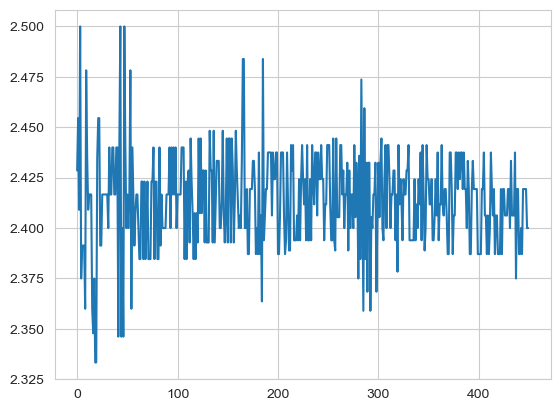

In [4]:
box_size_x = load_metric(run_id, "box_size_x")
box_size_y = load_metric(run_id, "box_size_y")

sns.lineplot(data=box_size_x / box_size_y)

<AxesSubplot:>

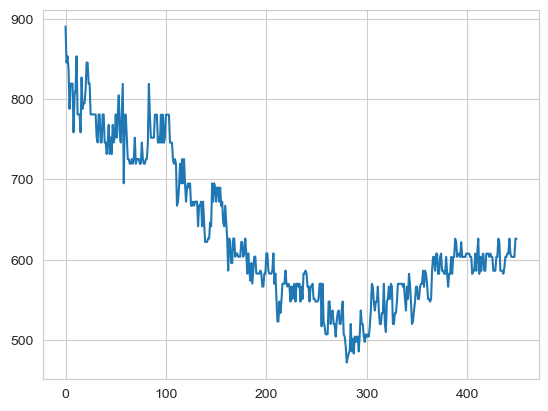

In [5]:
object_dist_avg = load_metric(run_id, "object_dist_avg")
sns.lineplot(data=object_dist_avg)

<AxesSubplot:>

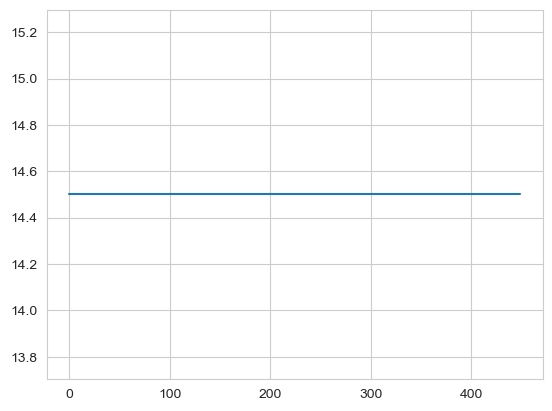

In [17]:
sim_koef_x = load_metric(run_id, "sim_koef_x")
box_size_x = load_metric(run_id, "box_size_x")
px_size_x = load_metric(run_id, "px_size_x")

sns.lineplot(data=box_size_x * px_size_x * sim_koef_x)

In [6]:
len(object_dist_avg), object_dist_avg.mean()

(450, 628.993988376879)

<AxesSubplot:ylabel='Count'>

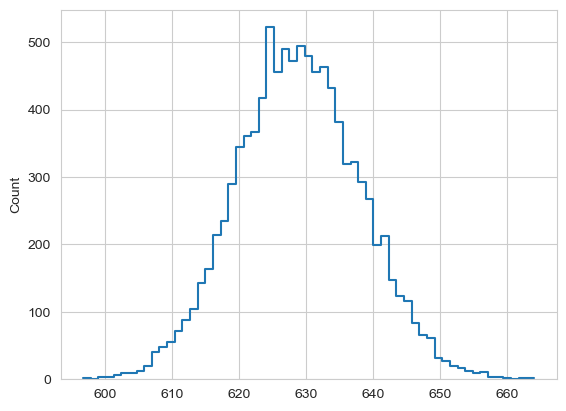

In [9]:
means = np.random.choice(object_dist_avg, (10000, 100), True).mean(axis=1)
sns.histplot(means, element='step', fill=False)